# Importação e bibioltecas e Leitura de dados

In [ ]:
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Lendo os datasets. O objetivo é formar um dataset final com base nesses dois

df_2019_2025 = pd.read_csv('dados_area_queimada_total.csv')
df_1985_2023 = pd.read_csv('dados_area_queimada_total_certo.csv')

# Visualização inicial dos dados

In [ ]:
# Vendo o escopo dos datasets
print(df_2019_2025.head())
print(df_1985_2023.head())

   _ano  _mes _estado  que_area_queimada
0  2019     1      RR          288023.96
1  2019     1      PA           45438.64
2  2019     1      MA           42692.58
3  2019     1      MT           41483.86
4  2019     1      MS           25428.81
   _ano  _mes _estado  que_area_queimada
0  1985     1      TO                174
1  1985     2      TO               1387
2  1985     3      TO               3634
3  1985     4      TO               3995
4  1985     5      TO              25561


# Filtragem dos estados de interesse

In [ ]:
# Tratando o df_2019_2025 para ter apenas os estados interessados (AC, AP, AM, MT, PA, RO, RR, TO, MA)

# Lista de estados que quero manter no dataset
estados_interesse = ["AC", "AP", "AM", "MT", "PA", "RO", "RR", "TO", "MA"]

# Mantém apenas os estados de interesse
df_2019_2025 = df_2019_2025[df_2019_2025["_estado"].isin(estados_interesse)]

print("\nEstados presentes no dataset:\n")
print(df_2019_2025["_estado"].unique())



Estados presentes no dataset:

['RR' 'PA' 'MA' 'MT' 'RO' 'AM' 'TO' 'AP' 'AC']


#Verificação de valores ausentes e zeros

In [ ]:
# Análise dos NaNs e dos zeros nos datasets

# Dataset dos anos 2019 a 2025
print("\nContagem de NaNs df_2019_2025 por coluna:\n")
print(df_2019_2025.isna().sum())
print("\nContagem de zeros df_2019_2025 por coluna:\n")
print(df_2019_2025.eq(0).sum())

# anos 2024 e 2025 do Dataset dos anos 2019 a 2025
print("\nContagem de NaNs df_2019_2025 de 2024 e 2025 por coluna:\n")
print(df_2019_2025[df_2019_2025['_ano'].isin([2024, 2025])].isna().sum())
print("\nContagem de zeros df_2019_2025 de 2024 e 2025 por coluna:\n")
print(df_2019_2025[df_2019_2025['_ano'].isin([2024, 2025])].eq(0).sum())

# Dataset dos anos 1985 a 2023
print("\nContagem de NaNs df_1985_2023 por coluna:\n")
print(df_1985_2023.isna().sum())
print("\nContagem de zeros df_1985_2023 por coluna:\n")
print(df_1985_2023.eq(0).sum())



Contagem de NaNs df_2019_2025 por coluna:

_ano                 0
_mes                 0
_estado              0
que_area_queimada    0
dtype: int64

Contagem de zeros df_2019_2025 por coluna:

_ano                 0
_mes                 0
_estado              0
que_area_queimada    8
dtype: int64

Contagem de NaNs df_2019_2025 de 2024 e 2025 por coluna:

_ano                 0
_mes                 0
_estado              0
que_area_queimada    0
dtype: int64

Contagem de zeros df_2019_2025 de 2024 e 2025 por coluna:

_ano                 0
_mes                 0
_estado              0
que_area_queimada    3
dtype: int64

Contagem de NaNs df_1985_2023 por coluna:

_ano                 0
_mes                 0
_estado              0
que_area_queimada    0
dtype: int64

Contagem de zeros df_1985_2023 por coluna:

_ano                   0
_mes                   0
_estado                0
que_area_queimada    146
dtype: int64


#Análise anos 2019 a 2023

Escolhemos seguir com o dataset df_1985_2023 como principal. Precisamos analisar os dados do dataset df_2019_2025 a fim de
verificar se vão entrar no dataset final — se esses dados estão condizentes com o dataset de 1985 a 2023. Se estiver condizente,
vamos trocar os dados faltantes do dataset escolhido como principal pelos dados do dataset df_2019_2025, com o mês e ano
correspondente — apenas os anos de 2019 a 2023 são incluídos.

Analisamos a fonte na qual retiramos o dataset df_1985_2023 (MapBiomas) e vimos que os dados faltantes são substituídos por zeros
quando baixamos o csv. Então, tratamos os dados faltantes como zeros inicialmente.

##Comparando quais datas têm zero em ambos os datasets

In [ ]:

# anos de interesse filtrados
anos_para_comparar = [2019, 2020, 2021, 2022, 2023]
df_1985_2023_filtrado = df_1985_2023[df_1985_2023["_ano"].astype(int).isin(anos_para_comparar)]
df_2019_2025_filtrado = df_2019_2025[df_2019_2025["_ano"].astype(int).isin(anos_para_comparar)]

# Verificando se tem dados faltantes nos anos de 2019 a 2023 no df_1985_2023
zeros_2019_2023 = (df_1985_2023_filtrado["que_area_queimada"] == 0).sum()
print(f"\nNúmero de valores 0 no df_1985_2023 entre 2019 e 2023: {zeros_2019_2023}")

# Identificando datas com zero no df_1985_2023
zeros_1985_2023 = df_1985_2023_filtrado[
    df_1985_2023_filtrado["que_area_queimada"] == 0
][["_ano", "_mes", "_estado"]]

print("\nDatas (ano, mês, estado) com zero no df_1985_2023:")
print(zeros_1985_2023)

# Identificando datas com zero no df_2019_2025
zeros_2019_2025 = df_2019_2025_filtrado[
    df_2019_2025_filtrado["que_area_queimada"] == 0
][["_ano", "_mes", "_estado"]]

print("\nDatas (ano, mês, estado) com zero no df_2019_2025 entre 2019 e 2023:")
print(zeros_2019_2025)

# Comparando quais datas têm zero em ambos os datasets
set_zeros_1985_2023 = set([tuple(x) for x in zeros_1985_2023.values])
set_zeros_2019_2025 = set([tuple(x) for x in zeros_2019_2025.values])

datas_comum = set_zeros_1985_2023 & set_zeros_2019_2025
print("\nDatas (ano, mês, estado) com zero em AMBOS os datasets entre 2019 e 2023:")
print(datas_comum)
print(f"\nDatas com zero em ambos: {len(datas_comum)}")



Número de valores 0 no df_1985_2023 entre 2019 e 2023: 4

Datas (ano, mês, estado) com zero no df_1985_2023:
      _ano  _mes _estado
3217  2019     2      AP
3229  2020     2      AP
3241  2021     2      AP
3242  2021     3      AP

Datas (ano, mês, estado) com zero no df_2019_2025 entre 2019 e 2023:
      _ano  _mes _estado
53    2019     2      AC
458   2020     5      AP
782   2021     5      AP
1052  2022     3      AC
1079  2022     4      AC

Datas (ano, mês, estado) com zero em AMBOS os datasets entre 2019 e 2023:
set()

Datas com zero em ambos: 0


#Correlação e tabela de comparação

In [ ]:
# Nenhum conjunto data e estado tem zero nos dois datasets! Não precisamos tratar os zeros (NaNs), por enqanto, do df_2029_2025

# Encontrar os valores de que_area_queimada no df_2019_2025_filtrado nas mesmas datas e estados em que o df_1985_2023 apresenta valor zero
# Realiza uma junção interna (inner join) -> mantém apenas os registros que aparecem nos dois dfs com os mesmos valores de ano, mês, estado

valores_df2019_2025_nas_datas_de_zeros = df_2019_2025_filtrado.merge(
    zeros_1985_2023,
    on=["_ano", "_mes", "_estado"],
    how="inner"
)

# Substituindo zeros por NaN no df principal para calcular a média corretamente
df_1985_2023["que_area_queimada"] = df_1985_2023["que_area_queimada"].replace(0, np.nan)

# Calculando a média de área queimada por mês e estado do df_1985_2023
media_area_queimada_1985_2023 = df_1985_2023.groupby(["_mes", "_estado"])["que_area_queimada"].mean()


# Adicionando coluna com a média histórica no dataframe
valores_df2019_2025_nas_datas_de_zeros["media_area_queimada_1985_2023"] = valores_df2019_2025_nas_datas_de_zeros.apply(
    lambda row: media_area_queimada_1985_2023.get((row["_mes"], row["_estado"])),
    axis=1
)

# Renomeando a coluna de valor real do df_2019_2025 para ficar mais claro
valores_df2019_2025_nas_datas_de_zeros = valores_df2019_2025_nas_datas_de_zeros.rename(
    columns={"que_area_queimada": "area_queimada_2019_2025"}
)

# Calcular a correlação
correlacao = valores_df2019_2025_nas_datas_de_zeros["area_queimada_2019_2025"].corr(
    valores_df2019_2025_nas_datas_de_zeros["media_area_queimada_1985_2023"]
)

print(f"\nCorrelação entre área queimada do df_2019_2025 e média mensal por estado do df_1985_2023 nos dados faltantes do df_1985_2023 entre os anos de 2019 e 2023 : {correlacao:.4f}")

print("\nTabela de comparação:")
print(valores_df2019_2025_nas_datas_de_zeros[["_ano", "_mes", "_estado", "area_queimada_2019_2025", "media_area_queimada_1985_2023"]])



Correlação entre área queimada do df_2019_2025 e média mensal por estado do df_1985_2023 nos dados faltantes do df_1985_2023 entre os anos de 2019 e 2023 : 0.5243

Tabela de comparação:
   _ano  _mes _estado  area_queimada_2019_2025  media_area_queimada_1985_2023
0  2019     2      AP                   286.87                    2191.758621
1  2020     2      AP                    93.86                    2191.758621
2  2021     2      AP                    28.61                    2191.758621
3  2021     3      AP                     1.43                    1379.482759


#Análise dos anos 2024 e 2025


Correlação entre área queimada 2024/2025 e a média histórica: 0.8794

Comparação de valores 2024/2025 vs média histórica:
     _ano  _mes _estado  que_area_queimada_2024_2025  \
0    2024     1      RR                    414231.55   
1    2024     1      PA                    314557.35   
2    2024     1      AM                     94155.13   
3    2024     1      MA                     76555.27   
4    2024     1      MT                     53699.59   
..    ...   ...     ...                          ...   
130  2025     3      MA                      4577.76   
131  2025     3      AM                       565.98   
132  2025     3      RO                       282.66   
133  2025     3      AC                        58.61   
134  2025     3      AP                        48.54   

     media_historica_1985_2023  
0                101544.552632  
1                 91843.000000  
2                  8990.131579  
3                 77539.916667  
4                 45076.394737  
..    

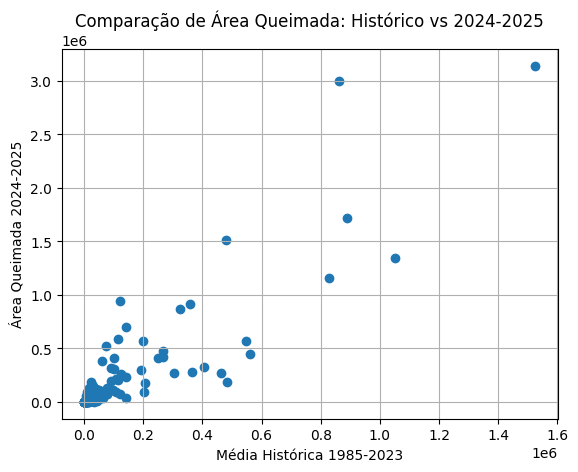

In [ ]:

# Precisamos decidir se vamos juntar os dados dos anos 2024 e 2025 do df_2019_2025 com o df_1985_2023.

# Substitui zeros por NaN e preenche os valores ausentes com a média por estado e mês
df_2019_2025["que_area_queimada"] = df_2019_2025["que_area_queimada"].replace(0, np.nan)
df_2019_2025["que_area_queimada"] = df_2019_2025.groupby(["_estado", "_mes"])["que_area_queimada"].transform(lambda x: x.fillna(x.mean()))

# Filtra apenas os anos de 2024 e 2025
df_2024_2025 = df_2019_2025[df_2019_2025["_ano"].isin([2024, 2025])]

# Média histórica de 1985-2023 por mês e estado
df_1985_2023["que_area_queimada"] = df_1985_2023["que_area_queimada"].replace(0, np.nan)
media_historica = df_1985_2023.groupby(["_estado", "_mes"])["que_area_queimada"].mean().reset_index()
media_historica = media_historica.rename(columns={"que_area_queimada": "media_historica_1985_2023"})
df_2024_2025 = df_2024_2025.rename(columns={"que_area_queimada": "que_area_queimada_2024_2025"})

# Juntar as tabelas para comparar
comparacao_2024_2025 = df_2024_2025.merge(
    media_historica,
    on=["_estado", "_mes"],
    how="left"
)
# left join, ou seja: Mantém todas as linhas de df_2024_2025. Traz os valores correspondentes de media_historica, caso existam.


#print(comparacao_2024_2025.head())

# Calcular correlação
correlacao = comparacao_2024_2025["que_area_queimada_2024_2025"].corr(comparacao_2024_2025["media_historica_1985_2023"])

print(f"\nCorrelação entre área queimada 2024/2025 e a média histórica: {correlacao:.4f}")

# Mostrar comparação entre os valores de 2024 e 2025 do df_2019_2025 com os valores do df_1985_2023
print("\nComparação de valores 2024/2025 vs média histórica:")
print(comparacao_2024_2025[["_ano", "_mes", "_estado", "que_area_queimada_2024_2025", "media_historica_1985_2023"]])


plt.scatter(comparacao_2024_2025["media_historica_1985_2023"], comparacao_2024_2025["que_area_queimada_2024_2025"])
plt.xlabel("Média Histórica 1985-2023")
plt.ylabel("Área Queimada 2024-2025")
plt.title("Comparação de Área Queimada: Histórico vs 2024-2025")
plt.grid(True)
plt.show()


#Construção do DataFrame final

  Juntando o df_1985_2023 com df_2019_2025:
   
 Decidimos por trocar os valores faltantes do df_1985_2023 nos anos de 2019 a 2023 pelos valores do df_2019_2025
   com a mesma data e estado correspondente. Essa escolha foi feita, pois analisamos a correlação entre área queimada
   do df_2019_2025 - nas datas e por estado dos dados faltantes do df_1985_2023 - e a média mensal por estado do df_1985_2023
   entre os anos de 2019 e 2023. A correlação deu 0.5243, o que não é um valor muito alto, mas também não é baixo. Dessa forma,
   preferimos fazer a troca para se manter fiél a dados reais ao invés de apenas fazer a média para substituir os dados
   faltantes no df_1985_2023 nos anos de 2019 a 2023.

   Além disso, precisamos também substituir os NaNs do df_1985_2023 nos anos de 1985 a 2018 pela média agrupando por mês e estado.

   Optamos também por concatenar um df referente aos anos de 2024 e 2025 do df_2019_2025 no df_final, pois a correlação entre a área
   queimada 2024/2025 e a média da área queimada no df_1985_2023, agrupado por mês e estado deu 0.8794, um valor bom.


Objetivo:

  - Preencher os valores ausentes de área queimada no df_1985_2023 (1985–2023).
  - Substituir NaNs de 2019–2023 com dados reais do df_2019_2025.
  - Substituir NaNs de 1985–2018 com a média por mês e estado.
  - Adicionar dados de 2024 e 2025 ao DataFrame final.

In [ ]:
# Apenas temos NaNs na coluna "que_area_queimada" dos dois dfs

antes_2019 = df_1985_2023["_ano"] < 2019

# Substituindo os NaNs de "que_area_queimada" dos aos antes de 2019 pela média agrupado por mês e estado
df_1985_2023.loc[antes_2019, "que_area_queimada"] = (
    df_1985_2023[antes_2019]
    .groupby(["_mes", "_estado"])["que_area_queimada"]
    .transform(lambda x: x.fillna(x.mean()))
)

# Substitui os NaNs de 2019–2023 por valores reais equivalentes do df_2019_2025
# A substituição é feita linha a linha, garantindo correspondência por ano, mês e estado

for i, row in valores_df2019_2025_nas_datas_de_zeros.iterrows():
    mask = (
        (df_1985_2023["_ano"] == row["_ano"]) &
        (df_1985_2023["_mes"] == row["_mes"]) &
        (df_1985_2023["_estado"] == row["_estado"]) &
        (df_1985_2023["que_area_queimada"].isna())
    )
    df_1985_2023.loc[mask, "que_area_queimada"] = row["area_queimada_2019_2025"]


df_2024_2025 = df_2024_2025.rename(columns={"que_area_queimada_2024_2025": "que_area_queimada"})
df_final = pd.concat([df_1985_2023, df_2024_2025], ignore_index=True)

print(df_final)
print("\nContagem de NaNs depois do preencimento:\n")
print(df_final.isna().sum())
print("\nContagem de zeros depois do preenchimento:\n")
print(df_final.eq(0).sum())
4212


      _ano  _mes _estado  que_area_queimada
0     1985     1      TO             174.00
1     1985     2      TO            1387.00
2     1985     3      TO            3634.00
3     1985     4      TO            3995.00
4     1985     5      TO           25561.00
...    ...   ...     ...                ...
4342  2025     3      MA            4577.76
4343  2025     3      AM             565.98
4344  2025     3      RO             282.66
4345  2025     3      AC              58.61
4346  2025     3      AP              48.54

[4347 rows x 4 columns]

Contagem de NaNs depois do preencimento:

_ano                 0
_mes                 0
_estado              0
que_area_queimada    0
dtype: int64

Contagem de zeros depois do preenchimento:

_ano                 0
_mes                 0
_estado              0
que_area_queimada    0
dtype: int64


4212

In [ ]:
df_final.to_csv("juncao_mapBiomas.csv", index=False)
files.download("juncao_mapBiomas.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>